# ВКР по курсу «Data Science PRO» Пронкин Сергей Игоревич

ОПИСАНИЕ ЗАДАНИЯ:
* В ходе выполнения ВКР требуется сделать:
* Изучить теоретические основы и методы решения поставленной задачи.
* Провести разведочный анализ предложенных данных. Необходимо нарисовать гистограммы распределения каждой из переменной, диаграммы ящика с усами, попарные графики рассеяния точек. Необходимо также для каждой колонке получить среднее, медианное значение, провести анализ и исключение выбросов, проверить наличие пропусков.
* Провести предобработку данных (удаление шумов, нормализация и т.д.).
* Обучить нескольких моделей для прогноза модуля упругости при растяжении и прочности при растяжении. При построении модели необходимо 30% данных оставить на тестирование модели, на остальных происходит обучение моделей. При построении моделей провести поиск гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой, количество блоков равно 10.
* Написать нейронную сеть, которая будет рекомендовать соотношение матрица-наполнитель. 
* Разработать приложение с графическим интерфейсом или интерфейсом командной строки, которое будет выдавать прогноз, полученный в задании 4 или 5 (один или два прогноза, на выбор учащегося).
* Оценить точность модели на тренировочном и тестовом датасете. 
* Создать репозиторий в GitHub и разместить там код исследования. 
* Оформить файл README.

## ТЕОРЕТИЧЕСКАЯ ОСНОВА

> Тема: Прогнозирование конечных свойств новых материалов (композиционных материалов).
> 
> Описание: 
> Композиционные материалы — это искусственно созданные материалы, состоящие из нескольких других с четкой границей между ними. 
> 
> При этом композиты являются монолитным материалом, т. е. компоненты материала неотделимы друг от друга без разрушения конструкции в целом. 
> 
> Их свойства определяются входящими в них компонентами, но отличаются от свойств компонентов, взятых в отдельности.
> 
> Композиционные материалы состоят из матрицы (основы) и наполнителя.
> 
> Матрица связывает композицию и в большей степени определяет технологические режимы получения материала и его эксплуатационные характеристики: рабочую температуру, плотность, удельную прочность, предел усталости.
> 
> Наполнитель, как правило, имеет высокие значения прочности, твердости и модуля упругости — значительно большие, чем показатели матрицы. Поэтому наполнитель является армирующим или упрочняющим элементом.
> 
> Композиты обладают теми свойствами, которые не наблюдаются у компонентов по отдельности. 
> 
> Даже если мы знаем характеристики исходных компонентов, определить характеристики композита, состоящего из этих компонентов, достаточно проблематично. Для решения этой проблемы есть два пути: физические испытания образцов материалов, или прогнозирование характеристик. Суть прогнозирования заключается в симуляции представительного элемента объема композита, на основе данных о характеристиках входящих компонентов (связующего и армирующего компонента). Созданные прогнозные модели помогут сократить количество проводимых испытаний, а также пополнить базу данных материалов возможными новыми характеристиками материалов, и цифровыми двойниками новых композитов.
> 
> Кейс основан на реальных производственных задачах Центра НТИ «Цифровое материаловедение: новые материалы и вещества» (структурное подразделение МГТУ им. Н.Э. Баумана).

## РАЗВЕДКА ДАННЫХ

В этом разделе необходимо:
* нарисовать гистограммы распределения каждой из переменной; 
* диаграммы ящика с усами;
* попарные графики рассеяния точек;
* для каждой колонке получить среднее, медианное значение;
* провести анализ и исключение выбросов;
* проверить наличие пропусков.

> Имеется датасет со свойствами композита. Рассматривается базальтопластик с нашивками из углепластика.
>
> На входе имеются данные о начальных свойствах компонентов композиционных материалов (количество связующего, наполнителя, температурный режим отверждения и т.д.). 
>
> На выходе необходимо спрогнозировать ряд конечных свойств получаемых композиционных материалов.
>
> Датасет состоит из двух файлов - X_bp (составляющая из базальтопластика) и Х_nup (составляющая из углепластика). Дано, что объединение делать по индексу тип объединения INNER.

In [1]:
# Подключаю доступ к файлам данных для гугл драйв
# from google.colab import drive
# drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# Пути для гугл драйв
# nb_path = '/content/drive/MyDrive/Colab Notebooks/'
# data_path = '/content/drive/MyDrive/Colab Notebooks/data/'
# models_path = '/content/drive/MyDrive/Colab Notebooks/models/'

In [3]:
# Пути для локального запуска
# nb_path = ''
# data_path = '../data/'
# models_path = '../models/'

In [1]:
# Импортирую необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
import pickle

In [2]:
# Импорт библиотеки TensorFlow
import tensorflow as tf
from tensorflow import keras


In [3]:
# Проверка версии библиотеки
print(tf.__version__) 

2.18.0


In [6]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
! pip install jinja2


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached jinja2-3.1.4-py3-none-any.whl.metadata (2.6 kB)
Using cached jinja2-3.1.4-py3-none-any.whl (133 kB)


In [7]:
# Определяю RANDOM_STATE для повторяемости результатов
RANDOM_STATE = 1809

In [8]:
# Загрузка исходные данные из файла X_bp
X_bp = pd.read_excel('X_bp.xlsx', index_col=0)
X_bp.shape

(1023, 10)

In [10]:
# Загрузка исходные данные из файла X_nup
X_nup = pd.read_excel('X_nup.xlsx', index_col=0)
X_nup.shape

(1040, 3)

X_bp содержит индекс + 10 признаков и 1023 строк.

X_nup содержит индекс + 3 признака и 1040 строк

## Список признаков

In [11]:
# Признаки для базальтопластика
pd.DataFrame(X_bp.columns, columns=['X_bp признаки'])

,X_bp признаки
0,Соотношение матрица-наполнитель
1,"Плотность, кг/м3"
2,"модуль упругости, ГПа"
3,"Количество отвердителя, м.%"
4,"Содержание эпоксидных групп,%_2"
5,"Температура вспышки, С_2"
6,"Поверхностная плотность, г/м2"
7,"Модуль упругости при растяжении, ГПа"
8,"Прочность при растяжении, МПа"
9,"Потребление смолы, г/м2"


In [12]:
# Признаки для Углепластика
pd.DataFrame(X_nup.columns, columns=['X_nup признаки'])

,X_nup признаки
0,"Угол нашивки, град"
1,Шаг нашивки
2,Плотность нашивки


## Объединение датасетов с типом INNER 
Ожидаю, что  должно остаться не более 1023 строк

In [14]:
df = X_bp.join(X_nup, how='inner')
df.shape

(1023, 13)

In [15]:
# Сохраню объединенные данные
df.to_excel('data_merged.xlsx')

Объедененный датасет готов к проведению анализа.

## Изучение  данных

In [16]:
# Посмотрю типы данных признаков
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки           

Вывод: Признаков с  типом object в датасете нет! DATA сет хорошо подготовлен

In [17]:
# Количество уникальных значений в каждом столбце
df.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

In [21]:
# Посмотрю описательную статистику
df_descr = df.describe().T
df_descr['median'] = df.median()
df_descr.style.format(precision=4)

,count,mean,std,min,25%,50%,75%,max,median
Соотношение матрица-наполнитель,1023.0000,2.9304,0.9132,0.3894,2.3179,2.9069,3.5527,5.5917,2.9069
"Плотность, кг/м3",1023.0000,1975.7349,73.7292,1731.7646,1924.1555,1977.6217,2021.3744,2207.7735,1977.6217
"модуль упругости, ГПа",1023.0000,739.9232,330.2316,2.4369,500.0475,739.6643,961.8125,1911.5365,739.6643
"Количество отвердителя, м.%",1023.0000,110.5708,28.2959,17.7403,92.4435,110.5648,129.7304,198.9532,110.5648
"Содержание эпоксидных групп,%_2",1023.0000,22.2444,2.4063,14.2550,20.6080,22.2307,23.9619,33.0000,22.2307
"Температура вспышки, С_2",1023.0000,285.8822,40.9433,100.0000,259.0665,285.8968,313.0021,413.2734,285.8968
"Поверхностная плотность, г/м2",1023.0000,482.7318,281.3147,0.6037,266.8166,451.8644,693.2250,1399.5424,451.8644
"Модуль упругости при растяжении, ГПа",1023.0000,73.3286,3.1190,64.0541,71.2450,73.2688,75.3566,82.6821,73.2688
"Прочность при растяжении, МПа",1023.0000,2466.9228,485.6280,1036.8566,2135.8504,2459.5245,2767.1931,3848.4367,2459.5245
"Потребление смолы, г/м2",1023.0000,218.4231,59.7359,33.8030,179.6275,219.1989,257.4817,414.5906,219.1989


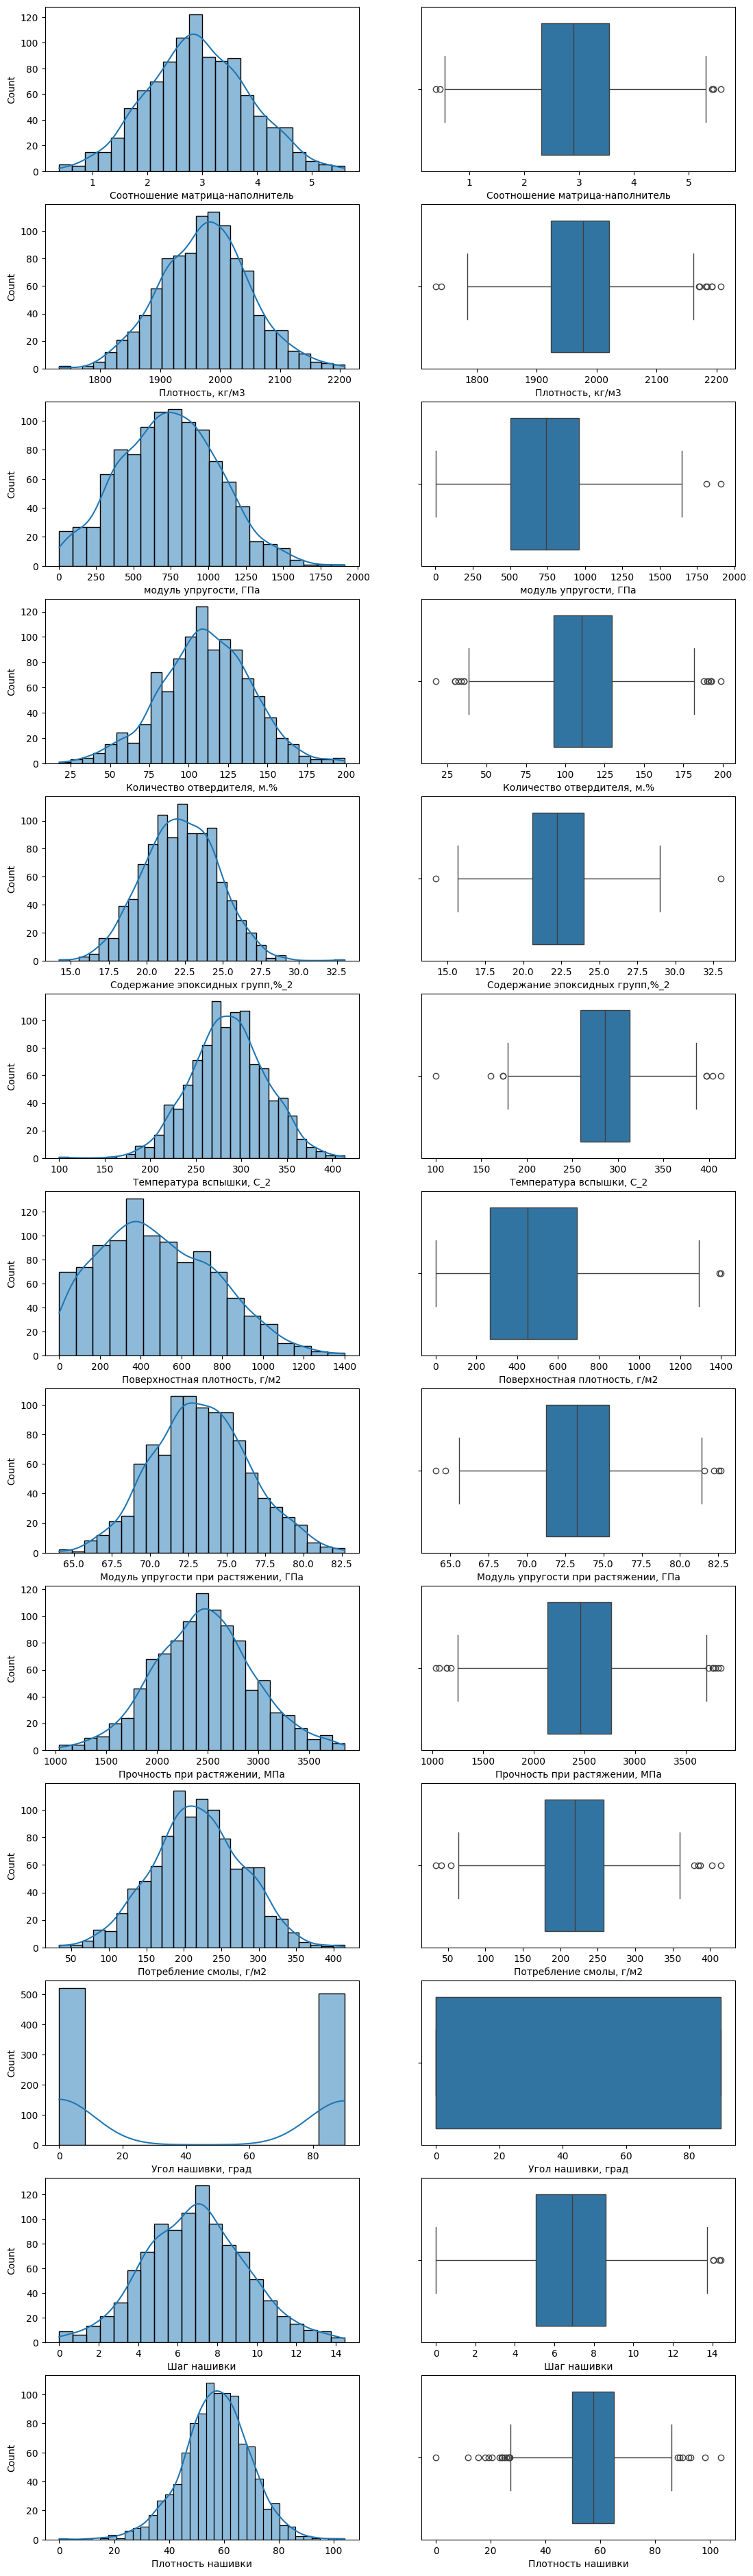

In [22]:
# Построю графики распределения переменных и "ящики с усами"
fig, axes = plt.subplots(13, 2, figsize=(13, 48))
for k, column in enumerate(df.columns):    
    sns.histplot(data=df, x=column, kde=True, ax=axes[k, 0])
    sns.boxplot(data=df, x=column, ax=axes[k, 1])
plt.show()

Все признаки, кроме "Угол нашивки, град" имеют нормальное распределение.
Они количественные, вещественные. Принимают неотрицательные значения.

"Угол нашивки, град" принимает 2 значения. Нужно превратить в бинарный признак.